In [401]:
import random
random.seed(27042012)
import numpy as np
np.random.seed(27042012) 
import pandas as pd
import itertools as it
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from networkit import *
from numeral import int2roman

In [71]:
plt.figure(figsize=(16, 6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [2]:
g=pd.read_csv("GENIE3.all_ranks.ranked_regulator_target_interactions.tsv.gz",delimiter="\t")
g.columns=[x.replace(".","_") for x in g.columns]
g.head()

,regulatoryGene,targetGene,weight,regulator_rank,target_rank,mutual_rank
0,Pp3c17_930.mRNA,Pp3s340_10.mRNA,0.067781,1,1,1.0
1,Pp3c1_27430.pre_miRNA,Pp3c15_12100.mRNA,0.067249,1,1,1.0
2,Pp3c17_17550.mRNA,Pp3c23_130.mRNA,0.066469,1,1,1.0
3,Pp3c17_18920.pre_miRNA,Pp3s32_420.mRNA,0.066327,1,1,1.0
4,Pp3c15_549.mRNA,Pp3c4_24040.mRNA,0.064005,1,1,1.0


In [51]:
gg=g.query("target_rank<=10",inplace=False)
print(len(g))
print(len(gg))

61897747
356457


In [52]:
G = nx.from_pandas_edgelist(gg,source="regulatoryGene",target="targetGene",edge_attr = ["weight","regulator_rank","target_rank","mutual_rank"],create_using=nx.DiGraph)

In [361]:
len(G.nodes())

35706

In [53]:
GG=nxadapter.nx2nk(G,weightAttr="weight")

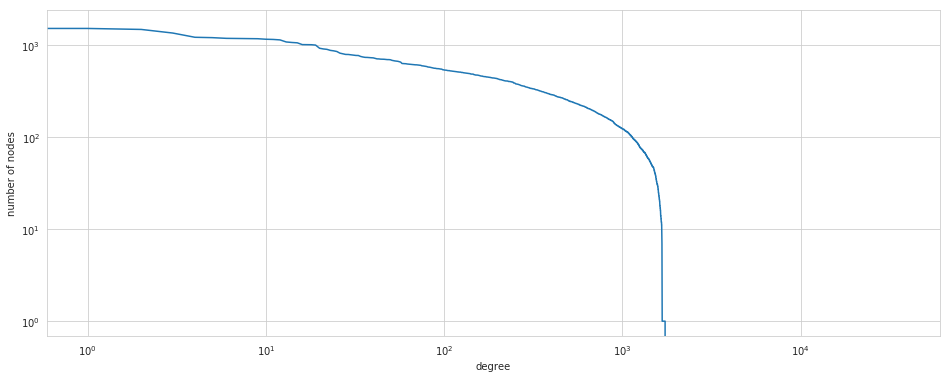

In [157]:
dd = sorted(centrality.DegreeCentrality(GG).run().scores(), reverse=True)
fig=plt.figure(figsize=(16, 6))
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
fig.savefig("GENIE3.top10_target_ranks.DegreeCentrality.png")

In [74]:
GGD=GG.toUndirected()

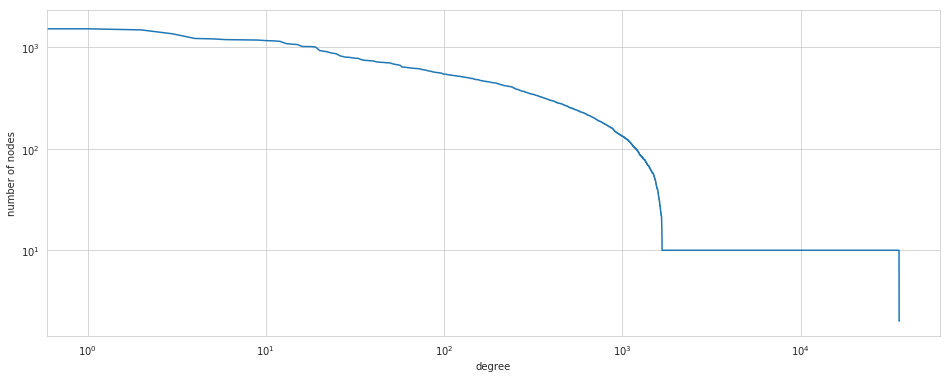

In [76]:
dd = sorted(centrality.DegreeCentrality(GGD).run().scores(), reverse=True)
plt.figure(figsize=(16, 6))
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)

In [65]:
communities = community.detectCommunities(GGD,algo=community.PLM(GGD),inspect=True)

PLM(balanced,pc,turbo) detected communities in 1.6644556522369385 [s]
solution properties:
-------------------  -----------
# communities          78
min community size      1
max community size   6167
avg. community size   457.769
modularity              0.571509
-------------------  -----------


In [66]:
community.Modularity().getQuality(communities, GGD)

0.5715085395311885

In [59]:
communities2 = community.detectCommunities(GGD,algo=community.PLP(GGD))

PLP detected communities in 0.6480176448822021 [s]
solution properties:
-------------------  ------------
# communities           73
min community size       1
max community size   32899
avg. community size    489.123
modularity               0.152555
-------------------  ------------


In [60]:
community.Modularity().getQuality(communities2, GGD)

0.15255462752987514

In [67]:
print("{0} elements assigned to {1} subsets".format(communities.numberOfElements(), communities.numberOfSubsets()))

35706 elements assigned to 78 subsets


In [68]:
print("the biggest subset has size {0}".format(max(communities.subsetSizes())))

the biggest subset has size 6167


In [69]:
community.writeCommunities(communities, "GENIE3.top10_target_ranks.communities_PLM.partition")

wrote communities to: GENIE3.top10_target_ranks.communities_PLM.partition


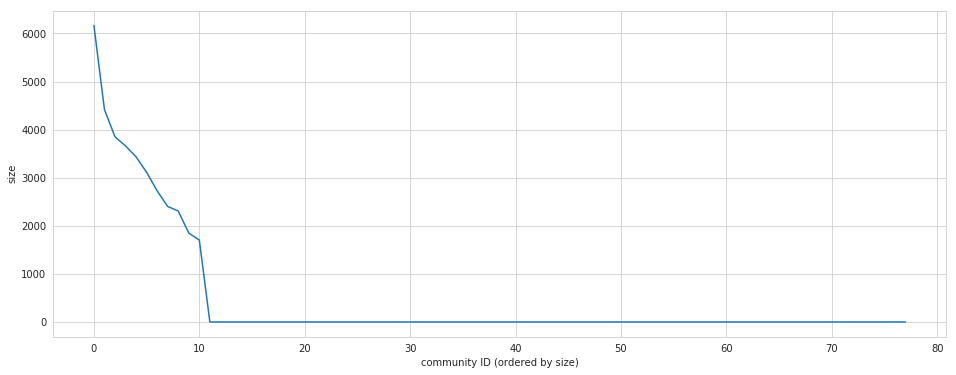

In [165]:
sizes = communities.subsetSizes()
sizes.sort(reverse=True)
fig=plt.figure(figsize=(16, 6))
plt.xlabel("community ID (ordered by size)")
plt.ylabel("size")
#ax1 = plt.subplot(2,1,1)
#ax1.set_ylabel("size")
#ax1.plot(sizes)
#fig = ax1.get_figure()
plt.plot(sizes)
fig.savefig("GENIE3.top10_target_ranks.communities_PLM.sizes.png")
#ax2 = plt.subplot(2,1,2)
#ax2.set_xscale("log")
#ax2.set_yscale("log")
#ax2.set_ylabel("size")
#ax2.plot(sizes)

In [98]:
for i in communities.getSubsetIds():
    x=len(communities.getMembers(i))
    if x>1:
        print("\t".join(list(map(lambda x: str(x),[i,x]))))

0	3112
1	4418
2	1705
3	2728
4	3435
5	1849
6	3851
7	3662
8	6167
9	2403
10	2309


In [123]:
NN=[x for x in G.nodes()]

In [103]:
i=2
c=communities.getMembers(i)
sg = GG.subgraphFromNodes(c)
print(sg.numberOfNodes())

1705


In [195]:
bc = centrality.Betweenness(sg)
bc.run()

In [126]:
def printtop(o,min=0,max=10):
     for (i,m) in o.ranking()[min:max]:
        print("\t".join(list(map(lambda x: str(x),[i,NN[i],m ] ))))

In [127]:
printtop(bc)

2171	Pp3c3_15850.mRNA	31270.0
1762	Pp3c14_2500.mRNA	30830.0
773	Pp3c17_16430.mRNA	27899.0
2055	Pp3c20_5500.mRNA	15091.0
3192	Pp3c6_8660.mRNA	13912.0
1331	Pp3c5_12130.mRNA	12581.0
2044	Pp3c13_9170.mRNA	10339.0
344	Pp3c26_13780.mRNA	10133.0
933	Pp3c17_19780.mRNA	9592.0
6445	Pp3c26_5450.mRNA	9235.0


In [128]:
i# Eigenvector centrality
ec = centrality.EigenvectorCentrality(sg)
ec.run()
printtop(ec)

350	Pp3c2_32960.mRNA	0.12320606655892614
569	Pp3c1_40480.mRNA	0.12134173099197565
771	Pp3c7_11750.mRNA	0.11255209338749739
1622	Pp3c9_25960.mRNA	0.11048239559876917
967	Pp3c11_25800.mRNA	0.10980007486981283
1799	Pp3c25_7190.mRNA	0.10949547784392646
345	Pp3c12_23790.mRNA	0.10905798694457468
896	Pp3c4_4140.mRNA	0.1080361624413301
1578	Pp3c22_10520.mRNA	0.10527118037817784
415	Pp3c23_17570.mRNA	0.10000299721858845


In [129]:
dc = centrality.DegreeCentrality(sg)
dc.run()
printtop(dc)

2171	Pp3c3_15850.mRNA	331.0
702	Pp3c5_860.mRNA	298.0
1946	Pp3c12_17560.mRNA	284.0
329	Pp3c9_10290.mRNA	282.0
1493	Pp3c10_24550.mRNA	272.0
1331	Pp3c5_12130.mRNA	268.0
2110	Pp3c17_470.mRNA	252.0
349	Pp3c6_14470.mRNA	234.0
3192	Pp3c6_8660.mRNA	234.0
1947	Pp3c13_14400.mRNA	218.0


In [141]:
gg.head()

,regulatoryGene,targetGene,weight,regulator_rank,target_rank,mutual_rank
0,Pp3c17_930.mRNA,Pp3s340_10.mRNA,0.067781,1,1,1.0
1,Pp3c1_27430.pre_miRNA,Pp3c15_12100.mRNA,0.067249,1,1,1.0
2,Pp3c17_17550.mRNA,Pp3c23_130.mRNA,0.066469,1,1,1.0
3,Pp3c17_18920.pre_miRNA,Pp3s32_420.mRNA,0.066327,1,1,1.0
4,Pp3c15_549.mRNA,Pp3c4_24040.mRNA,0.064005,1,1,1.0


In [147]:
for (x,y)  in GG.edges()[0:10]:
    print("{} {}".format(NN[x],NN[y]))

Pp3c17_930.mRNA Pp3s340_10.mRNA
Pp3c17_930.mRNA Pp3c19_7324.mRNA
Pp3c17_930.mRNA Pp3c9_10300.mRNA
Pp3c17_930.mRNA Pp3c3_4460.mRNA
Pp3c17_930.mRNA Pp3c17_3220.mRNA
Pp3c17_930.mRNA Pp3c13_12450.mRNA
Pp3c17_930.mRNA Pp3c17_5140.ncRNA
Pp3c17_930.mRNA Pp3s39_260.mRNA
Pp3c17_930.mRNA Pp3c8_4700.mRNA
Pp3c17_930.mRNA Pp3c13_2400.mRNA


In [300]:
def analyzeSubgraph(i):
    c=communities.getMembers(i)
    sg = GG.subgraphFromNodes(c)
    SG=nxadapter.nk2nx(sg)
    
    rc=list()
    llen=len(SG.nodes())
    if llen>1:
        print("Working on subgraph {} with {} nodes".format(i,llen))
        for n in SG.nodes():
            l=nx.local_reaching_centrality(SG, n)
            o=[n,l]
            rc.append(o)
    else:
        (n,)=SG.nodes()
        rc.append([n,0])
    rc=pd.DataFrame(rc,columns=["id","local_reaching_centrality"])
    bc = centrality.Betweenness(sg)
    bc.run()
    bc=pd.DataFrame(bc.ranking(),columns=["id","betweenness_centrality"])
    bc=pd.concat([bc.id.apply(lambda i: NN[i]).rename("geneid"),bc],axis=1)
    bc.set_index(["id"])
    ec = centrality.EigenvectorCentrality(sg)
    ec.run()
    ec=pd.DataFrame(ec.ranking(),columns=["id","eigenvector_centrality"])
    ec=pd.concat([ec.id.apply(lambda i: NN[i]).rename("geneid"),ec],axis=1)
    ec.set_index(["id"])
    dc = centrality.DegreeCentrality(sg)
    dc.run()
    dc=pd.DataFrame(dc.ranking(),columns=["id","degree_centrality"])
    dc=pd.concat([dc.id.apply(lambda i: NN[i]).rename("geneid"),dc],axis=1)
    dc.set_index(["id"])
    out=pd.merge(pd.merge(pd.merge(dc,bc,on=["id","geneid"]),ec,on=["id","geneid"]),rc,on=["id"])
    out["community"]=i+1 #keep community 0 for non-connections
    out.set_index(["id"],inplace=True)
    return(out.iloc[:,[0,5,1,2,3,4]])

In [302]:
out=list()
for i in communities.getSubsetIds():
    out.append(analyzeSubgraph(i))
out=pd.concat(out)

Working on subgraph 0 with 3112 nodes
Working on subgraph 1 with 4418 nodes
Working on subgraph 2 with 1705 nodes
Working on subgraph 3 with 2728 nodes
Working on subgraph 4 with 3435 nodes
Working on subgraph 5 with 1849 nodes
Working on subgraph 6 with 3851 nodes
Working on subgraph 7 with 3662 nodes
Working on subgraph 8 with 6167 nodes
Working on subgraph 9 with 2403 nodes
Working on subgraph 10 with 2309 nodes


In [303]:
out.head()

,geneid,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality
id,,,,,,
1829,Pp3c11_23290.mRNA,1,552.0,3190.0,0.053599,0.997107
1910,Pp3c7_2300.mRNA,1,505.0,7529.0,0.025181,0.997107
982,Pp3c17_23620.mRNA,1,490.0,1988.0,0.054197,0.997107
2118,Pp3c16_13280.mRNA,1,485.0,9982.0,0.056344,0.997107
145,Pp3c15_11610.mRNA,1,461.0,3734.0,0.040499,0.997107


In [304]:
print(len(NN))
print(len(out))

35706
35706


In [469]:
out["community"]=out.community.apply(lambda x: int2roman(x,only_ascii=True))

In [470]:
out.head()

,geneid,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality
id,,,,,,
1022,Pp3c27_3080.mRNA,I,109.0,0.0,0.000000,0.997750
1829,Pp3c11_23290.mRNA,I,552.0,3190.0,0.053599,0.997107
1910,Pp3c7_2300.mRNA,I,505.0,7529.0,0.025181,0.997107
982,Pp3c17_23620.mRNA,I,490.0,1988.0,0.054197,0.997107
2118,Pp3c16_13280.mRNA,I,485.0,9982.0,0.056344,0.997107


In [491]:
ggg=pd.merge(pd.merge(gg,out[["geneid","community"]],left_on="regulatoryGene",right_on="geneid"),out[["geneid","community"]],left_on="targetGene",right_on="geneid")
ggg.rename(mapper={"community_x":"regulator_community","community_y":"target_community"},axis=1,inplace=True)
ggg.drop(["geneid_x","geneid_y"],axis=1,inplace=True)
ggg["community"]=np.where(ggg.regulator_community== ggg.target_community, ggg.regulator_community,0)

In [492]:
ggg.head()

,regulatoryGene,targetGene,weight,regulator_rank,target_rank,mutual_rank,regulator_community,target_community,community
0,Pp3c17_930.mRNA,Pp3s340_10.mRNA,0.067781,1,1,1.000000,I,I,I
1,Pp3c1_36240.mRNA,Pp3s340_10.mRNA,0.013277,153,4,24.738634,VI,I,0
2,Pp3c2_25760.mRNA,Pp3s340_10.mRNA,0.015763,58,3,13.190906,I,I,I
3,Pp3c19_10050.mRNA,Pp3s340_10.mRNA,0.009034,496,7,58.923679,I,I,I
4,Pp3c11_17010.mRNA,Pp3s340_10.mRNA,0.008481,109,10,33.015148,XI,I,0


In [493]:
ggg.to_csv("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.tsv.gz",sep="\t",index=False)

In [494]:
ggg.query("community!=0").to_csv("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.only_intra.tsv.gz",sep="\t",index=False)

In [495]:
com=dict([(int2roman(i+1,only_ascii=True),len(communities.getMembers(i))) for i in communities.getSubsetIds()])

In [496]:
out.sort_values(["community","local_reaching_centrality","degree_centrality","betweenness_centrality","eigenvector_centrality"],ascending=[True,False,False,False,False],inplace=True)

In [497]:
out.head()

,geneid,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality
id,,,,,,
1022,Pp3c27_3080.mRNA,I,109.0,0.0,0.000000,0.997750
1829,Pp3c11_23290.mRNA,I,552.0,3190.0,0.053599,0.997107
1910,Pp3c7_2300.mRNA,I,505.0,7529.0,0.025181,0.997107
982,Pp3c17_23620.mRNA,I,490.0,1988.0,0.054197,0.997107
2118,Pp3c16_13280.mRNA,I,485.0,9982.0,0.056344,0.997107


In [498]:
rank=list()
for c in com.keys():
    e=0
    for (i, row) in out.loc[out.community==c].iterrows():
        e+=1
        row["centrality_rank"]=e
        rank.append(row)
rank=pd.concat(rank,axis=1).T
rank.head()

,geneid,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality,centrality_rank
1022,Pp3c27_3080.mRNA,I,109,0,0,0.99775,1
1829,Pp3c11_23290.mRNA,I,552,3190,0.0535992,0.997107,2
1910,Pp3c7_2300.mRNA,I,505,7529,0.0251815,0.997107,3
982,Pp3c17_23620.mRNA,I,490,1988,0.0541971,0.997107,4
2118,Pp3c16_13280.mRNA,I,485,9982,0.0563442,0.997107,5


In [518]:
rank.to_csv("GENIE3.top10_target_ranks.communities_PLM.with_node_centralities.csv",sep=";",index=False)

In [500]:
reggg=ggg.loc[(ggg.targetGene.isin(ggg.regulatoryGene.unique())) & (ggg.community.isin([0]+list(filter(lambda x: com[x]>1, com.keys()))))]
len(reggg)

16690

In [501]:
com["I"]

3112

In [502]:
reggg.groupby("community").median()

,weight,regulator_rank,target_rank,mutual_rank
community,,,,
0,0.010186,201,6,32.511536
I,0.015500,85,5,20.988088
II,0.011714,72,5,18.520259
III,0.014090,87,5,20.639767
IV,0.011705,57,5,16.077928
IX,0.011935,104,5,22.472205
V,0.015652,148,5,27.386128
VI,0.012445,186,5,28.142495
VII,0.016330,128,5,25.059801


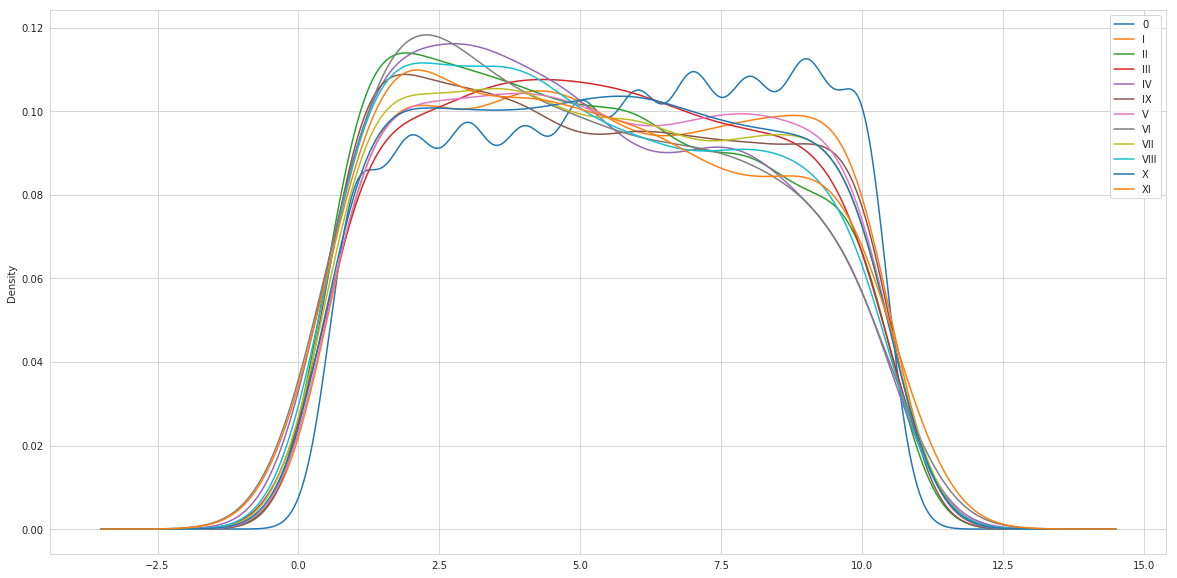

In [503]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df in reggg.groupby('community'):
    df.target_rank.plot(kind="kde", ax=ax, label=label)
plt.legend()
fig.savefig("GENIE3.top10_target_ranks.communities_PLM.only_regulators.target_rank_density.png")

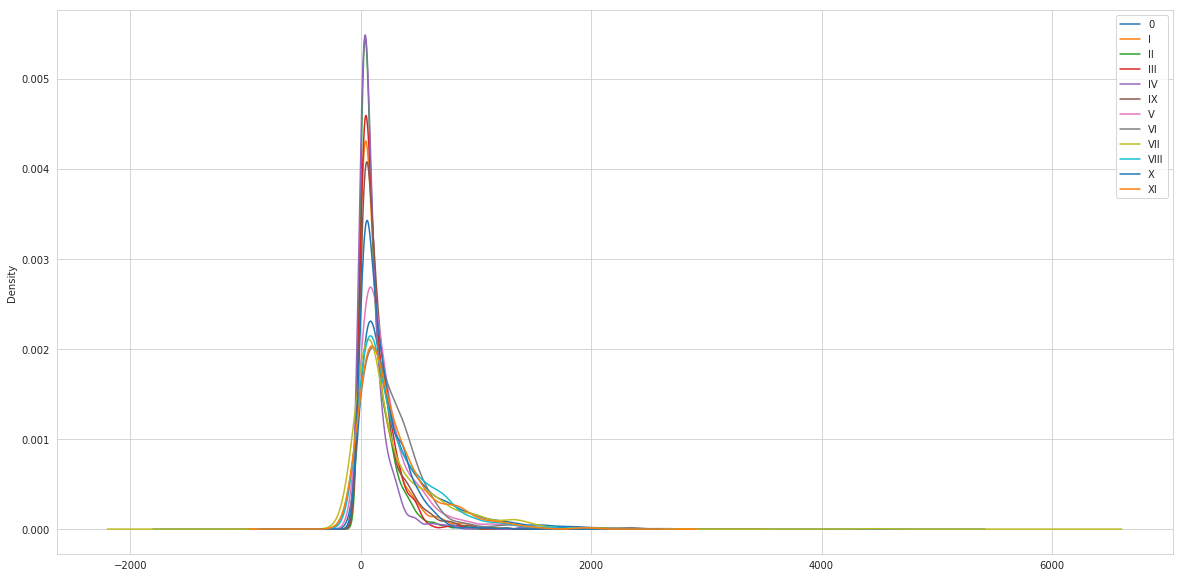

In [504]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df in reggg.groupby('community'):
    df.regulator_rank.plot(kind="kde", ax=ax, label=label)
plt.legend()
fig.savefig("GENIE3.top10_target_ranks.communities_PLM.only_regulators.regulator_rank_density.png")

In [505]:
reggg.to_csv("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.only_regulators.tsv.gz",sep="\t",index=False)

In [506]:
cr=pd.read_csv("GENIE3.all_ranks.ranked_regulator_target_interactions.correlations_and_directionality.tsv.gz",sep="\t")
cr.head()

,regulatoryGene,targetGene,weight,regulator_rank,target_rank,mutual_rank,full_cor,full_reg,our_cor,our_reg
0,Pp3c17_930.mRNA,Pp3s340_10.mRNA,0.067781,1,1,1.0,0.130485,+,1.874270e-15,+
1,Pp3c1_27430.pre_miRNA,Pp3c15_12100.mRNA,0.067249,1,1,1.0,0.558926,+,6.662628e-01,+
2,Pp3c17_17550.mRNA,Pp3c23_130.mRNA,0.066469,1,1,1.0,0.846470,+,8.916522e-01,+
3,Pp3c17_18920.pre_miRNA,Pp3s32_420.mRNA,0.066327,1,1,1.0,1.000000,+,1.000000e+00,+
4,Pp3c15_549.mRNA,Pp3c4_24040.mRNA,0.064005,1,1,1.0,1.000000,+,1.000000e+00,+


In [513]:
crr=pd.merge(cr.drop(["weight","regulator_rank","target_rank","mutual_rank"],axis=1),reggg,on=["regulatoryGene","targetGene"])#.loc[:,["regulatoryGene","targetGene"]])
len(crr)

16690

In [517]:
print(len(ggg))
crr2=pd.merge(cr.drop(["weight","regulator_rank","target_rank","mutual_rank"],axis=1),ggg,on=["regulatoryGene","targetGene"])
print(len(crr2))
crr2.to_csv("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.correlations_and_directionality.tsv.gz",sep="\t",index=False)

356457
356457


In [514]:
#crr["name"]=crr.apply(lambda x: "{} (regulates) {}".format(x.regulatoryGene,x.targetGene),axis=1)
crr.head()

,regulatoryGene,targetGene,full_cor,full_reg,our_cor,our_reg,weight,regulator_rank,target_rank,mutual_rank,regulator_community,target_community,community
0,Pp3c5_4990.mRNA,Pp3c5_5006.mRNA,-0.507013,-,-6.752306e-01,-,0.063180,1,1,1.000000,IV,IV,IV
1,Pp3c5_5006.mRNA,Pp3c5_4990.mRNA,-0.507013,-,-6.752306e-01,-,0.054928,1,1,1.000000,IV,IV,IV
2,Pp3c1_32440.mRNA,Pp3c17_13620.mRNA,0.852632,+,6.034049e-01,+,0.054642,3,1,1.732051,II,II,II
3,Pp3c14_22330.mRNA,Pp3c8_13921.pre_miRNA,0.093738,+,4.391533e-16,+,0.054016,1,1,1.000000,VIII,VIII,VIII
4,Pp3c25_5040.mRNA,Pp3c25_4920.mRNA,0.899198,+,8.479255e-01,+,0.050805,1,1,1.000000,VIII,VIII,VIII


In [515]:
crr.to_csv("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.only_regulators.correlations_and_directionality.tsv.gz",sep="\t",index=False)